# Lesson 15

In [6]:
from pathlib import Path
from ebmdatalab import bq

DATA_FOLDER = Path("data")

sql = """
SELECT
  DATE(p.month) AS month,
  SUM(CASE WHEN p.aware IN ('Watch','Reserve') THEN p.items ELSE 0 END) AS numerator_items,
  SUM(CASE WHEN p.aware IN ('Access','Watch','Reserve') THEN p.items ELSE 0 END) AS denominator_items,
  SAFE_DIVIDE(
    SUM(CASE WHEN p.aware IN ('Watch','Reserve') THEN p.items ELSE 0 END),
    SUM(CASE WHEN p.aware IN ('Access','Watch','Reserve') THEN p.items ELSE 0 END)
  ) * 100 AS pct_watch_reserve_of_aware
FROM `measures.vw__aware_abx` AS p
GROUP BY 1
ORDER BY 1;
"""

data = bq.cached_read(sql, DATA_FOLDER / "AWaRe_data.csv", use_cache=True)
data

,month,numerator_items,denominator_items,pct_watch_reserve_of_aware
0,2010-08-01,659551,2462205,26.787006
1,2010-09-01,743706,2829962,26.279717
2,2010-10-01,771089,3000002,25.702950
3,2010-11-01,796602,3147402,25.309827
4,2010-12-01,973484,4028562,24.164553
...,...,...,...,...
175,2025-03-01,483884,2538458,19.062124
176,2025-04-01,452790,2345942,19.300989
177,2025-05-01,447583,2256875,19.831980
178,2025-06-01,432624,2178217,19.861382


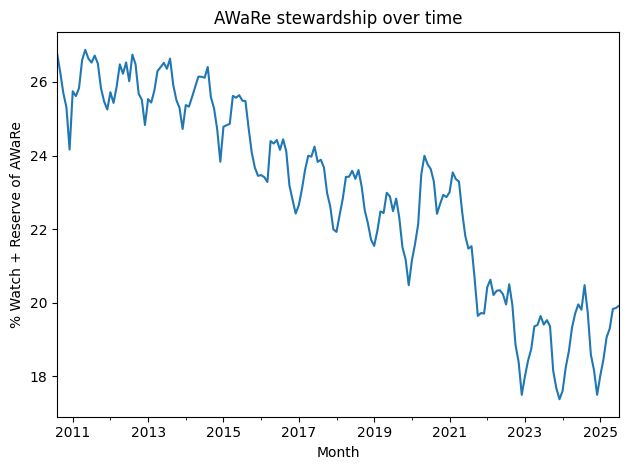

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data["month"] = pd.to_datetime(data["month"])
ax = data.plot(
    x="month",
    y="pct_watch_reserve_of_aware",
    kind="line",
    legend=False
)
ax.set_ylabel("% Watch + Reserve of AWaRe")
ax.set_xlabel("Month")
ax.set_title("AWaRe stewardship over time")
plt.tight_layout()
plt.show()
